In [94]:
import os, sys, re, datetime, copy
import numpy as np
import astropy.units as u
from astropy.table import Table
sys.path.insert(1, os.path.join(os.path.dirname(os.getcwd()), 'utils'))

In [95]:
# User defined global parameters

list_of_N_CO = 10**np.arange(17.0, 20.0, 0.25)
list_of_X_CICO = np.arange(0.05, 1.0+0.05, 0.05)
list_of_n_H2 = [1e2, 1e3, 1e4, 1e5, 1e6]
#list_of_T_kin = [15., 25., 50., 100.] # len=npanel
#list_of_d_V_for_T_kin = [4., 10., 50., 90.] # len=npanel
#list_of_CO_abundance_for_T_kin = [3e-4, 3e-4, 3e-4, 3e-4] # len=npanel
list_of_T_kin = [15., 20., 50., 100.] # len=npanel
list_of_d_V_for_T_kin = [4., 10., 50., 90.] # len=npanel
list_of_CO_abundance_for_T_kin = [1e-4, 2e-4, 3e-4, 3e-4] # len=npanel
#line_width = 30. # 5.

#in_table_name = 'out_table_RADEX_R_CI10CO21_sim_XCICO_dv_%gkms'%(line_width)
in_table_name_by_d_V = {}
for d_V in list_of_d_V_for_T_kin:
    d_V_str = '%g'%(d_V)
    if d_V_str not in in_table_name_by_d_V:
        in_table_name = 'out_table_RADEX_R_CI10CO21_sim_XCICO_dv_%gkms'%(d_V)
        in_table_name_by_d_V[d_V_str] = in_table_name

#select_X_CICO = 1.0
#out_fig_name = 'Plot_RADEX_R_CI10CO21_sim_XCICO_1pX_1p0'

#select_X_CICO = 0.5
#out_fig_name = 'Plot_RADEX_R_CI10CO21_sim_XCICO_1pX_0p5'

#select_X_CICO = 0.2
#out_fig_name = 'Plot_RADEX_R_CI10CO21_sim_XCICO_1pX_0p2'

#select_X_CICO = 0.1
#out_fig_name = 'Plot_RADEX_R_CI10CO21_varied_CO_abundance_selected_RNCINCO_0p1'

#select_X_CICO = 0.2
#out_fig_name = 'Plot_RADEX_R_CI10CO21_varied_CO_abundance_selected_RNCINCO_0p2'

select_X_CICO = 1.0
out_fig_name = 'Plot_RADEX_R_CI10CO21_varied_CO_abundance_selected_RNCINCO_1p0'

out_fig_size = (20, 4.2) # RADEX includes n_H2 = 1e2, so wider figure

out_fig_margin = {'left':0.08, 'right':0.945, 'bottom':0.18, 'top':0.75}


In [96]:
# Read table

data_table_by_d_V = {}
for d_V in list_of_d_V_for_T_kin:
    d_V_str = '%g'%(d_V)
    if d_V_str not in data_table_by_d_V:
        print('Reading "%s"'%(in_table_name_by_d_V[d_V_str] + '.csv'))
        in_table = Table.read(in_table_name_by_d_V[d_V_str] + '.csv', format='csv')
        data_table = in_table[np.isclose(in_table['X_CICO'], select_X_CICO)] # select X_CICO = 1.0
        print('Selecting X_CICO = %s'%(select_X_CICO))
        data_table_by_d_V[d_V_str] = copy.copy(data_table)


Reading "out_table_RADEX_R_CI10CO21_sim_XCICO_dv_4kms.csv"
Selecting X_CICO = 1.0
Reading "out_table_RADEX_R_CI10CO21_sim_XCICO_dv_10kms.csv"
Selecting X_CICO = 1.0
Reading "out_table_RADEX_R_CI10CO21_sim_XCICO_dv_50kms.csv"
Selecting X_CICO = 1.0
Reading "out_table_RADEX_R_CI10CO21_sim_XCICO_dv_90kms.csv"
Selecting X_CICO = 1.0


In [97]:
from matplotlib.patches import Rectangle, FancyBboxPatch

def add_fancy_box(axes, list_of_n_H2, list_of_N_CO):
    axes[0].add_artist(FancyBboxPatch(xy=[np.argmin(np.abs(np.log10(list_of_n_H2)-3.0)),
                                          np.argmin(np.abs(np.log10(list_of_N_CO)-17.75))], 
                                      width=3, height=3, boxstyle='round,pad=0.1',
                                      facecolor='none', edgecolor='k', lw=2))
    axes[1].add_artist(FancyBboxPatch(xy=[np.argmin(np.abs(np.log10(list_of_n_H2)-3.0)),
                                          np.argmin(np.abs(np.log10(list_of_N_CO)-18.00))], 
                                      width=3, height=3, boxstyle='round,pad=0.1',
                                      facecolor='none', edgecolor='k', lw=2))
    axes[2].add_artist(FancyBboxPatch(xy=[np.argmin(np.abs(np.log10(list_of_n_H2)-3.0)),
                                          np.argmin(np.abs(np.log10(list_of_N_CO)-18.50))], 
                                      width=3, height=3, boxstyle='round,pad=0.1',
                                      facecolor='none', edgecolor='k', lw=2))
    axes[3].add_artist(FancyBboxPatch(xy=[np.argmin(np.abs(np.log10(list_of_n_H2)-3.0)),
                                          np.argmin(np.abs(np.log10(list_of_N_CO)-19.00))], 
                                      width=3, height=3, boxstyle='round,pad=0.1',
                                      facecolor='none', edgecolor='k', lw=2))


minima 0.0078 maxima 0.75
Output to 'Plot_RADEX_R_CI10CO21_varied_CO_abundance_selected_RNCINCO_1p0_LTE.pdf'


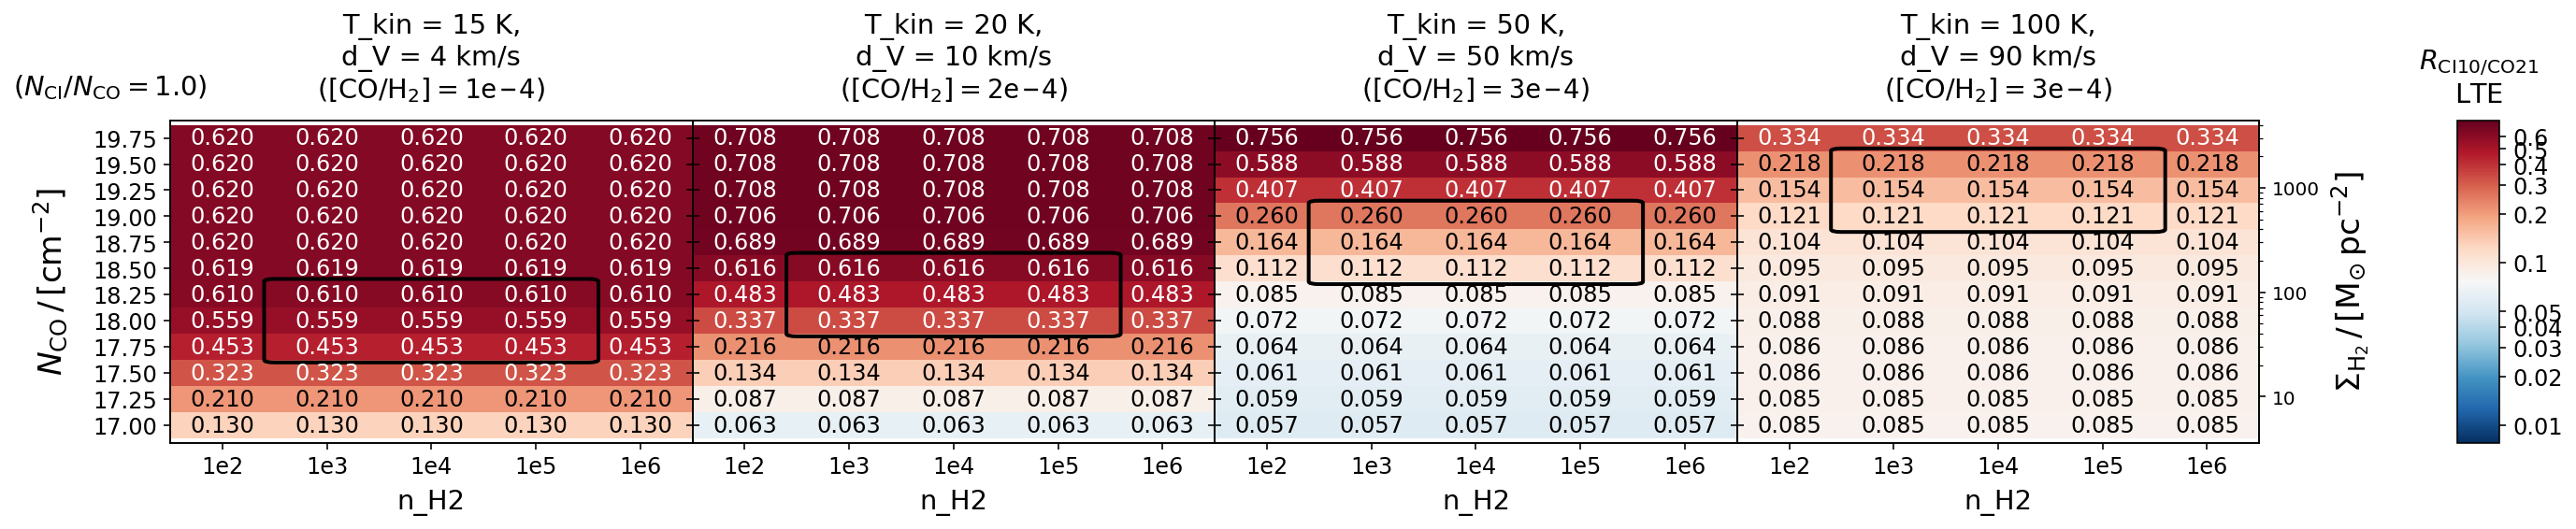

In [98]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import ticker
from matplotlib.patches import Rectangle, FancyBboxPatch

#minima = np.min(data_table['R_CI10CO21_LTE'])
#maxima = np.max(data_table['R_CI10CO21_LTE'])
#print('minima', minima, 'maxima', maxima)
minima, maxima = 0.00780, 0.75
print('minima', minima, 'maxima', maxima)
# norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
norm = matplotlib.colors.LogNorm(vmin=minima, vmax=maxima, clip=True)
cmap = cm.RdBu_r # cm.jet # cm.viridis # cm.RdYlBu_r
colormapper = cm.ScalarMappable(norm=norm, cmap=cmap)

fig = plt.figure(figsize=out_fig_size)
fig.subplots_adjust(**out_fig_margin)
gs = gridspec.GridSpec(ncols=len(list_of_T_kin)+2, nrows=1, figure=fig, 
                       width_ratios=[1]*len(list_of_T_kin)+[0.38,0.08], wspace=0, hspace=0)
axes = []
for i in range(len(list_of_T_kin)):
    ax = fig.add_subplot(gs[0, i])
    axes.append(ax)
right_axes = []
for iax, T_kin in enumerate(list_of_T_kin):
    d_V = list_of_d_V_for_T_kin[iax]
    T_kin_str = '%.0f'%(T_kin)
    d_V_str = '%.0f'%(d_V)
    CO_abundance = list_of_CO_abundance_for_T_kin[iax]
    CO_abundance_str = '{:g}e{:g}'.format(CO_abundance/10**np.floor(np.log10(CO_abundance)), 
                                          np.floor(np.log10(CO_abundance)))
    axes[iax].set_xlabel('n_H2', fontsize='x-large', labelpad=6)
    axes[iax].set_xlim([0, len(list_of_n_H2)])
    axes[iax].set_xticks(np.arange(len(list_of_n_H2))+0.5)
    axes[iax].set_xticklabels([('%.0e'%(t)).replace('e+0','e') for t in list_of_n_H2])
    axes[iax].set_ylim([0, len(list_of_N_CO)])
    axes[iax].set_yticks(np.arange(len(list_of_N_CO))+0.5)
    if iax == 0: 
        axes[iax].set_ylabel(r'$N_{\mathrm{CO}} \, / \, [\mathrm{cm^{-2}}]$', 
                             #r'$\frac{ N_{\mathrm{CO}} / [\mathrm{cm^{-2}}] } '
                             #'{ (\Delta v \, / \, %.0f \, [\mathrm{km \, s^{-1}}]) }$'%(line_width), 
                             fontsize='xx-large', labelpad=12)
        axes[iax].set_yticklabels(['%.2f'%(np.log10(t)) for t in list_of_N_CO])
    else:
        axes[iax].set_yticklabels([])
    axes[iax].tick_params(labelsize='large')
    axes[iax].set_aspect(0.25)
    #axes[iax].set_title(f'T_kin = {T_kin_str} K,' + '\n' + f'd_V = {d_V_str} km/s', fontsize='x-large', pad=12)
    axes[iax].set_title(f'T_kin = {T_kin_str} K,' + '\n' + \
                        f'd_V = {d_V_str} km/s' + '\n' + \
                        r'($[{\mathrm{CO}}/{\mathrm{H_2}}]={\tt{%s}})$'%(CO_abundance_str), 
                        fontsize='x-large', pad=12) # panel title
    right_axes.append(axes[iax].twinx())
    right_axes[iax].set_aspect(0.25)
    right_axes[iax].set_yticks(np.arange(len(list_of_N_CO))+0.5)
    right_axes[iax].set_yticklabels([])
    right_axes[iax].set_ylim(axes[iax].get_ylim())

ax_colorbar = fig.add_subplot(gs[0, -1])
ax_colorbar.set_title(r'$R_{\mathrm{CI10}/\mathrm{CO21}}$'+'\n'+r'$\mathrm{LTE}$', fontsize='x-large', pad=10)
ax_colorbar.tick_params(labelsize='large')
cbar = fig.colorbar(mappable=colormapper, cax=ax_colorbar)
cbar.set_ticks([0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())
cbar.ax.yaxis.set_minor_locator(ticker.LogLocator())

for iy, N_CO in enumerate(list_of_N_CO):
    for ix, n_H2 in enumerate(list_of_n_H2):
        for iax, T_kin in enumerate(list_of_T_kin):
            # 
            d_V = list_of_d_V_for_T_kin[iax]
            d_V_str = '%g'%(d_V)
            data_table = data_table_by_d_V[d_V_str]
            # 
            ax = axes[iax]
            #irow = iy*4*3 + ix*3 + iax #<TODO># n(nH2)=4, n(Tkin)=3
            irow = np.argwhere(np.logical_and.reduce((
                np.isclose(np.log10(data_table['N_CO']), np.log10(N_CO)), 
                np.isclose(np.log10(data_table['n_H2']), np.log10(n_H2)), 
                np.isclose(data_table['T_kin'], T_kin), 
            ))).ravel()
            if len(irow) > 0:
                irow = irow[0]
            else:
                continue
            # 
            R_CI10CO21_NonLTE = data_table['R_CI10CO21_NonLTE'][irow]
            R_CI10CO21_LTE = data_table['R_CI10CO21_LTE'][irow]
            x = n_H2
            y = N_CO
            v = R_CI10CO21_LTE
            #v = R_CI10CO21_NonLTE
            ax.fill_between([ix, ix+1], [iy, iy], [iy+1, iy+1], color=colormapper.to_rgba(v), alpha=1.0, lw=0.0)
            if v < 0.02 or v > 0.3:
                text_color = 'w'
            else:
                text_color = 'k'
            ax.text(ix+0.5, iy+0.5, '{:.3f}'.format(v), 
                    ha='center', va='center', color=text_color, fontsize='large')

# show top left text
ax = axes[0]
ax.text(-0.30, 1.06, r'($N_{\mathrm{CI}}/N_{\mathrm{CO}} = %.1f)$'%(select_X_CICO), 
        ha='left', va='bottom', fontsize='x-large', transform=ax.transAxes)

# add a right y axis
ax = axes[-1]
axRight = right_axes[-1]
CO_abundance = list_of_CO_abundance_for_T_kin[-1]
y_tick_lim = np.array([0.5, len(list_of_N_CO)-1+0.5]) # [0.5, N-1+0.5]
y_value_lim = np.array([np.min(np.log10(list_of_N_CO)), np.max(np.log10(list_of_N_CO))])
y_value_lim =  np.array([y_value_lim[0]-(y_value_lim[1]-y_value_lim[0])*0.5/float(y_tick_lim[1]-y_tick_lim[0]),
                         y_value_lim[1]+(y_value_lim[1]-y_value_lim[0])*0.5/float(y_tick_lim[1]-y_tick_lim[0])])
right_y_value_lim = (10**y_value_lim) / CO_abundance * 1.60141791e-20
                  # (const.m_p+const.m_p-const.m_e) * ((1.*u.pc).to(u.cm).value)**2 / \
                  # const.M_sun = 1.60141791e-20, [CO/H2] = 3e-4
right_y_value_lim = np.log10(right_y_value_lim)
right_y_value_list = np.array([10., 100., 1000., 10000.])
right_y_tick_list = (np.log10(right_y_value_list) - right_y_value_lim[0]) / \
                    (right_y_value_lim[1] - right_y_value_lim[0]) * (y_tick_lim[1] - y_tick_lim[0] + 1)
axRight.set_yticks(right_y_tick_list)
axRight.set_yticklabels(['%.0f'%(t) for t in right_y_value_list])
axRight.set_ylabel(r'$\Sigma_{\mathrm{H_2}} \, / \, [\mathrm{M_{\odot}\,pc^{-2}}]$', 
                   fontsize='xx-large', labelpad=5) # show right y axis title in the last column panel
right_y_minor_tick_value_list = [] # manually determine minor tick locations
for y_value in right_y_value_list:
    right_y_minor_tick_value_list.extend((y_value * np.arange(2., 9.+1., 1.)).tolist())
right_y_minor_tick_pos_list = (np.log10(right_y_minor_tick_value_list) - right_y_value_lim[0]) / \
                              (right_y_value_lim[1] - right_y_value_lim[0]) * \
                              (y_tick_lim[1] - y_tick_lim[0] + 1)
axRight.set_yticks(right_y_minor_tick_pos_list, minor=True)
axRight.set_ylim(ax.get_ylim())

# add a highlighting box in each panel manually 
# to indicate the physically most plausible n_H2 and N_CO ranges
add_fancy_box(axes, list_of_n_H2, list_of_N_CO)

# save fig
print(f"Output to {out_fig_name+'_LTE.pdf'!r}")
fig.savefig(out_fig_name+'_LTE.pdf', dpi=300)

minima 0.0078 maxima 0.75
Output to 'Plot_RADEX_R_CI10CO21_varied_CO_abundance_selected_RNCINCO_1p0_NonLTE.pdf'


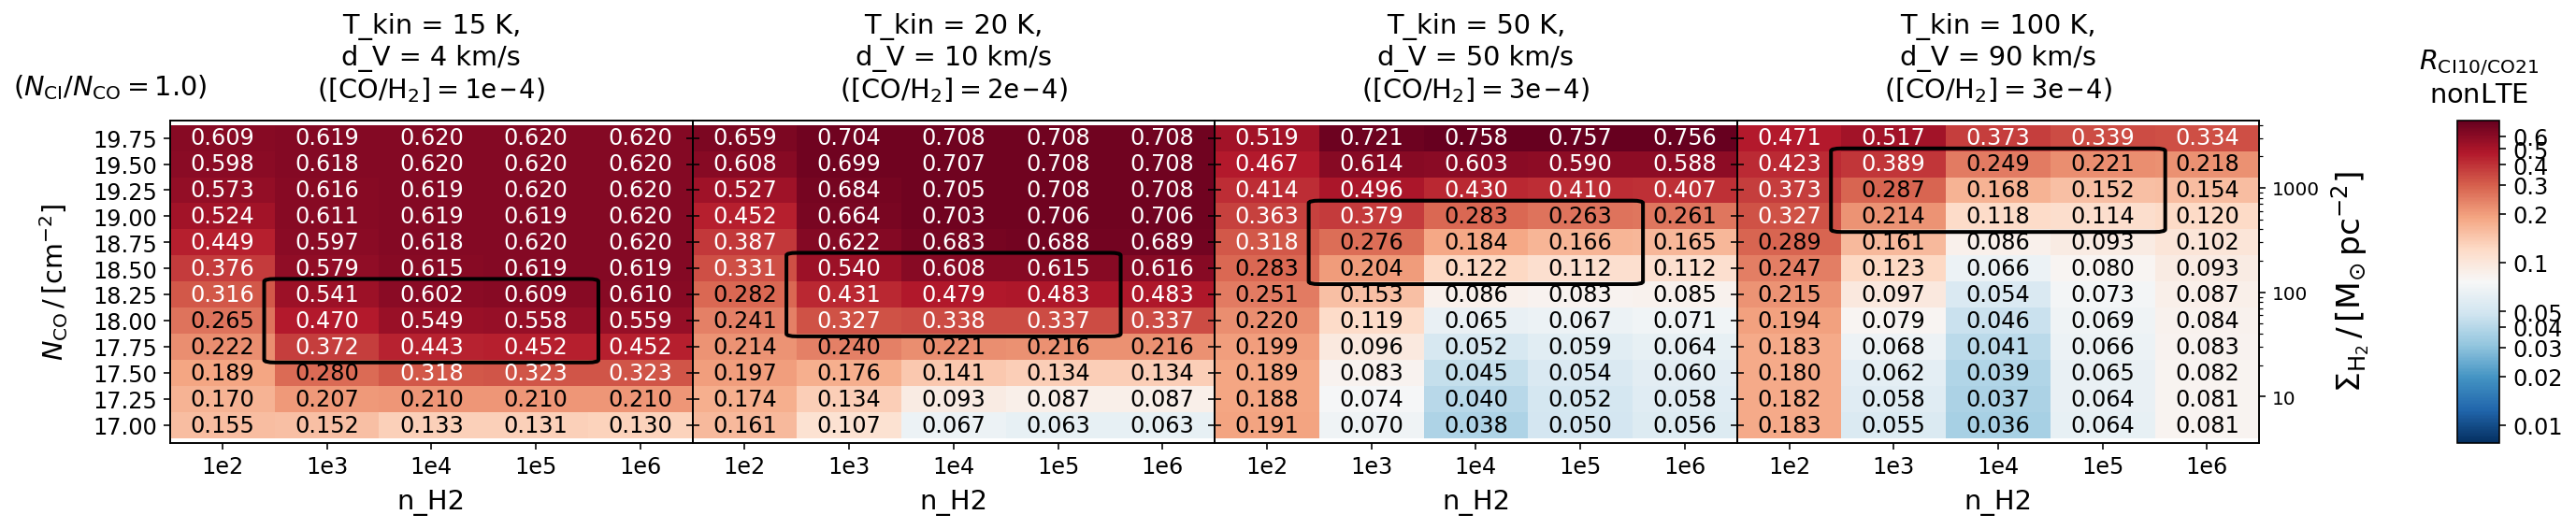

In [99]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import ticker

#minima = np.min(data_table['R_CI10CO21_NonLTE'])
#maxima = np.max(data_table['R_CI10CO21_NonLTE'])
#print('minima', minima, 'maxima', maxima)
minima, maxima = 0.00780, 0.75
print('minima', minima, 'maxima', maxima)
# norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
norm = matplotlib.colors.LogNorm(vmin=minima, vmax=maxima, clip=True)
cmap = cm.RdBu_r # cm.jet # cm.viridis # cm.RdYlBu_r
colormapper = cm.ScalarMappable(norm=norm, cmap=cmap)

fig = plt.figure(figsize=out_fig_size)
fig.subplots_adjust(**out_fig_margin)
gs = gridspec.GridSpec(ncols=len(list_of_T_kin)+2, nrows=1, figure=fig, 
                       width_ratios=[1]*len(list_of_T_kin)+[0.38,0.08], wspace=0, hspace=0)
axes = []
for i in range(len(list_of_T_kin)):
    ax = fig.add_subplot(gs[0, i])
    axes.append(ax)
right_axes = []
for iax, T_kin in enumerate(list_of_T_kin):
    d_V = list_of_d_V_for_T_kin[iax]
    T_kin_str = '%.0f'%(T_kin)
    d_V_str = '%.0f'%(d_V)
    CO_abundance = list_of_CO_abundance_for_T_kin[iax]
    CO_abundance_str = '{:g}e{:g}'.format(CO_abundance/10**np.floor(np.log10(CO_abundance)), 
                                          np.floor(np.log10(CO_abundance)))
    axes[iax].set_xlabel('n_H2', fontsize='x-large', labelpad=6)
    axes[iax].set_xlim([0, len(list_of_n_H2)])
    axes[iax].set_xticks(np.arange(len(list_of_n_H2))+0.5)
    axes[iax].set_xticklabels([('%.0e'%(t)).replace('e+0','e') for t in list_of_n_H2])
    axes[iax].set_ylim([0, len(list_of_N_CO)])
    axes[iax].set_yticks(np.arange(len(list_of_N_CO))+0.5)
    if iax == 0: 
        axes[iax].set_ylabel(r'$N_{\mathrm{CO}} \, / \, [\mathrm{cm^{-2}}]$', 
                             #r'$\frac{ N_{\mathrm{CO}} / [\mathrm{cm^{-2}}] } '
                             #'{ (\Delta v \, / \, %.0f \, [\mathrm{km \, s^{-1}}]) }$'%(line_width), 
                             fontsize='x-large', labelpad=12)
        axes[iax].set_yticklabels(['%.2f'%(np.log10(t)) for t in list_of_N_CO])
    else:
        axes[iax].set_yticklabels([])
    axes[iax].tick_params(labelsize='large')
    axes[iax].set_aspect(0.25)
    #axes[iax].set_title(f'T_kin = {T_kin_str} K,' + '\n' + f'd_V = {d_V_str} km/s', fontsize='x-large', pad=12)
    axes[iax].set_title(f'T_kin = {T_kin_str} K,' + '\n' + \
                        f'd_V = {d_V_str} km/s' + '\n' + \
                        r'($[{\mathrm{CO}}/{\mathrm{H_2}}]={\tt{%s}})$'%(CO_abundance_str), 
                        fontsize='x-large', pad=12) # panel title
    right_axes.append(axes[iax].twinx())
    right_axes[iax].set_aspect(0.25)
    right_axes[iax].set_yticks(np.arange(len(list_of_N_CO))+0.5)
    right_axes[iax].set_yticklabels([])
    right_axes[iax].set_ylim(axes[iax].get_ylim())

ax_colorbar = fig.add_subplot(gs[0, -1])
ax_colorbar.set_title(r'$R_{\mathrm{CI10}/\mathrm{CO21}}$'+'\n'+r'$\mathrm{nonLTE}$', fontsize='x-large', pad=10)
ax_colorbar.tick_params(labelsize='large')
cbar = fig.colorbar(mappable=colormapper, cax=ax_colorbar)
cbar.set_ticks([0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())
cbar.ax.yaxis.set_minor_locator(ticker.LogLocator())

for iy, N_CO in enumerate(list_of_N_CO):
    for ix, n_H2 in enumerate(list_of_n_H2):
        for iax, T_kin in enumerate(list_of_T_kin):
            # 
            d_V = list_of_d_V_for_T_kin[iax]
            d_V_str = '%g'%(d_V)
            data_table = data_table_by_d_V[d_V_str]
            # 
            ax = axes[iax]
            #irow = iy*4*3 + ix*3 + iax #<TODO># n(nH2)=4, n(Tkin)=3
            irow = np.argwhere(np.logical_and.reduce((
                np.isclose(np.log10(data_table['N_CO']), np.log10(N_CO)), 
                np.isclose(np.log10(data_table['n_H2']), np.log10(n_H2)), 
                np.isclose(data_table['T_kin'], T_kin), 
            ))).ravel()
            if len(irow) > 0:
                irow = irow[0]
            else:
                continue
            # 
            R_CI10CO21_NonLTE = data_table['R_CI10CO21_NonLTE'][irow]
            R_CI10CO21_LTE = data_table['R_CI10CO21_LTE'][irow]
            x = n_H2
            y = N_CO
            #v = R_CI10CO21_LTE
            v = R_CI10CO21_NonLTE
            ax.fill_between([ix, ix+1], [iy, iy], [iy+1, iy+1], color=colormapper.to_rgba(v), alpha=1.0, lw=0.0)
            if v < 0.02 or v > 0.3:
                text_color = 'w'
            else:
                text_color = 'k'
            ax.text(ix+0.5, iy+0.5, '{:.3f}'.format(v), 
                    ha='center', va='center', color=text_color, fontsize='large')

# show top left text
ax = axes[0]
ax.text(-0.30, 1.06, r'($N_{\mathrm{CI}}/N_{\mathrm{CO}} = %.1f)$'%(select_X_CICO), 
        ha='left', va='bottom', fontsize='x-large', transform=ax.transAxes)

# add a right y axis
ax = axes[-1]
axRight = right_axes[-1]
CO_abundance = list_of_CO_abundance_for_T_kin[-1]
y_tick_lim = np.array([0.5, len(list_of_N_CO)-1+0.5]) # [0.5, N-1+0.5]
y_value_lim = np.array([np.min(np.log10(list_of_N_CO)), np.max(np.log10(list_of_N_CO))])
y_value_lim =  np.array([y_value_lim[0]-(y_value_lim[1]-y_value_lim[0])*0.5/float(y_tick_lim[1]-y_tick_lim[0]),
                         y_value_lim[1]+(y_value_lim[1]-y_value_lim[0])*0.5/float(y_tick_lim[1]-y_tick_lim[0])])
right_y_value_lim = (10**y_value_lim) / CO_abundance * 1.60141791e-20
                  # (const.m_p+const.m_p-const.m_e) * ((1.*u.pc).to(u.cm).value)**2 / \
                  # const.M_sun = 1.60141791e-20, [CO/H2] = 3e-4
right_y_value_lim = np.log10(right_y_value_lim)
right_y_value_list = np.array([10., 100., 1000., 10000.])
right_y_tick_list = (np.log10(right_y_value_list) - right_y_value_lim[0]) / \
                    (right_y_value_lim[1] - right_y_value_lim[0]) * \
                    (y_tick_lim[1] - y_tick_lim[0] + 1)
axRight.set_yticks(right_y_tick_list)
axRight.set_yticklabels(['%.0f'%(t) for t in right_y_value_list])
axRight.set_ylabel(r'$\Sigma_{\mathrm{H_2}} \, / \, [\mathrm{M_{\odot}\,pc^{-2}}]$', 
                   fontsize='xx-large', labelpad=5) # show right y axis title in the last column panel
right_y_minor_tick_value_list = [] # manually determine minor tick locations
for y_value in right_y_value_list:
    right_y_minor_tick_value_list.extend((y_value * np.arange(2., 9.+1., 1.)).tolist())
right_y_minor_tick_pos_list = (np.log10(right_y_minor_tick_value_list) - right_y_value_lim[0]) / \
                              (right_y_value_lim[1] - right_y_value_lim[0]) * \
                              (y_tick_lim[1] - y_tick_lim[0] + 1)
axRight.set_yticks(right_y_minor_tick_pos_list, minor=True)
axRight.set_ylim(ax.get_ylim())

# add a highlighting box in each panel manually 
# to indicate the physically most plausible n_H2 and N_CO ranges
add_fancy_box(axes, list_of_n_H2, list_of_N_CO)

# save fig
print(f"Output to {out_fig_name+'_NonLTE.pdf'!r}")
fig.savefig(out_fig_name+'_NonLTE.pdf', dpi=300)

y_tick_lim [ 0.5 11.5]
delta_y 0.125
y_value_lim [16.875 19.875]
right_y_value_lim [4.00298006e+00 4.00298006e+03]
right_y_tick_list [ 1.59046629  5.59046629  9.59046629 13.59046629]
Output to 'Plot_RADEX_R_CI10CO21_varied_CO_abundance_selected_RNCINCO_1p0_R_NonLTE_LTE.pdf'


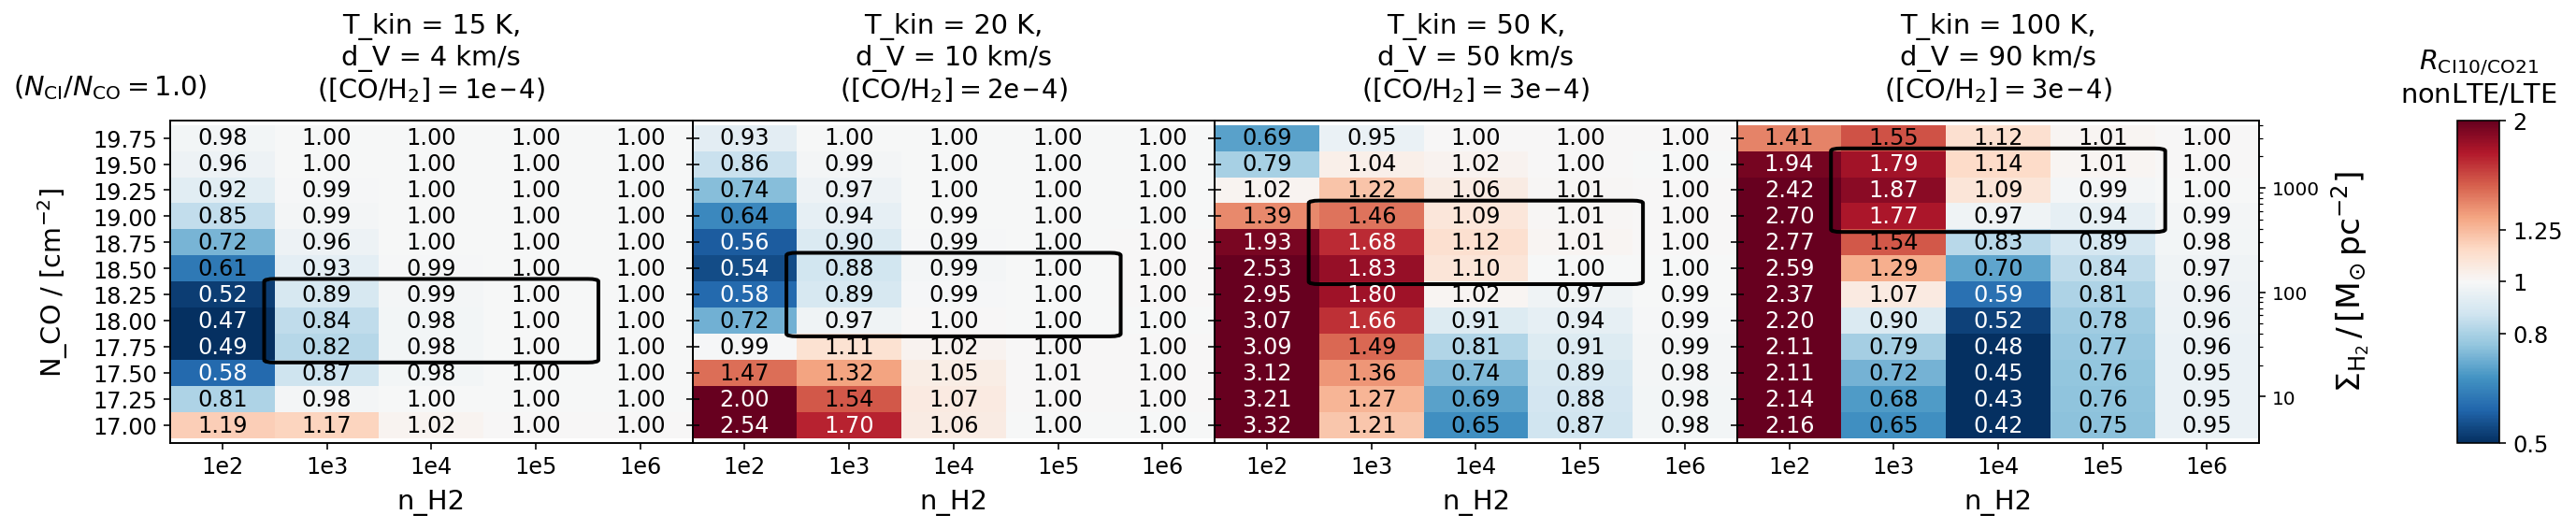

In [100]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import ticker

#minima = np.min(data_table['R_CI10CO21_NonLTE']/data_table['R_CI10CO21_LTE'])
#maxima = np.max(data_table['R_CI10CO21_NonLTE']/data_table['R_CI10CO21_LTE'])
#print('minima', minima, 'maxima', maxima)
minima = 0.5
maxima = 2.0
# norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
norm = matplotlib.colors.LogNorm(vmin=minima, vmax=maxima, clip=True)
cmap = cm.RdBu_r # cm.jet # cm.viridis # cm.RdYlBu_r
colormapper = cm.ScalarMappable(norm=norm, cmap=cmap)

fig = plt.figure(figsize=out_fig_size)
fig.subplots_adjust(**out_fig_margin)
gs = gridspec.GridSpec(ncols=len(list_of_T_kin)+2, nrows=1, figure=fig, 
                       width_ratios=[1]*len(list_of_T_kin)+[0.38,0.08], wspace=0, hspace=0)
axes = []
for i in range(len(list_of_T_kin)):
    ax = fig.add_subplot(gs[0, i])
    axes.append(ax)
right_axes = []
for iax, T_kin in enumerate(list_of_T_kin):
    d_V = list_of_d_V_for_T_kin[iax]
    T_kin_str = '%.0f'%(T_kin)
    d_V_str = '%.0f'%(d_V)
    CO_abundance = list_of_CO_abundance_for_T_kin[iax]
    CO_abundance_str = '{:g}e{:g}'.format(CO_abundance/10**np.floor(np.log10(CO_abundance)), 
                                          np.floor(np.log10(CO_abundance)))
    axes[iax].set_xlabel('n_H2', fontsize='x-large', labelpad=6)
    if iax == 0: 
        axes[iax].set_ylabel(r'$N_{\mathrm{CO}} \, / \, [\mathrm{cm^{-2}}]$', 
                             #r'$\frac{ N_{\mathrm{CO}} / [\mathrm{cm^{-2}}] } '
                             #'{ (\Delta v \, / \, %.0f \, [\mathrm{km \, s^{-1}}]) }$'%(line_width), 
                             fontsize='x-large', labelpad=12)
    axes[iax].set_xlabel('n_H2', fontsize='x-large', labelpad=6)
    axes[iax].set_xlim([0, len(list_of_n_H2)])
    axes[iax].set_xticks(np.arange(len(list_of_n_H2))+0.5)
    axes[iax].set_xticklabels([('%.0e'%(t)).replace('e+0','e') for t in list_of_n_H2])
    axes[iax].set_ylim([0, len(list_of_N_CO)])
    axes[iax].set_yticks(np.arange(len(list_of_N_CO))+0.5)
    if iax == 0: 
        axes[iax].set_ylabel(r'N_CO / [cm$^{-2}$]', fontsize='x-large', labelpad=12)
        axes[iax].set_yticklabels(['%.2f'%(np.log10(t)) for t in list_of_N_CO])
    else:
        axes[iax].set_yticklabels([])
    axes[iax].tick_params(labelsize='large')
    axes[iax].set_aspect(0.25)
    #axes[iax].set_title(f'T_kin = {T_kin_str} K,' + '\n' + f'd_V = {d_V_str} km/s', fontsize='x-large', pad=12)
    axes[iax].set_title(f'T_kin = {T_kin_str} K,' + '\n' + \
                        f'd_V = {d_V_str} km/s' + '\n' + \
                        r'($[{\mathrm{CO}}/{\mathrm{H_2}}]={\tt{%s}})$'%(CO_abundance_str), 
                        fontsize='x-large', pad=12) # panel title
    right_axes.append(axes[iax].twinx())
    right_axes[iax].set_aspect(0.25)
    right_axes[iax].set_yticks(np.arange(len(list_of_N_CO))+0.5)
    right_axes[iax].set_yticklabels([])
    right_axes[iax].set_ylim(axes[iax].get_ylim())

ax_colorbar = fig.add_subplot(gs[0, -1])
ax_colorbar.set_title(r'$R_{\mathrm{CI10}/\mathrm{CO21}}$'+'\n'+r'$\mathrm{nonLTE}/\mathrm{LTE}$', 
                      fontsize='x-large', pad=10)
ax_colorbar.tick_params(labelsize='large')
cbar = fig.colorbar(mappable=colormapper, cax=ax_colorbar)
cbar.set_ticks([0.5, 0.80, 1.0, 1.25, 2.0])
cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())
cbar.ax.yaxis.set_minor_locator(ticker.LogLocator())

for iy, N_CO in enumerate(list_of_N_CO):
    for ix, n_H2 in enumerate(list_of_n_H2):
        for iax, T_kin in enumerate(list_of_T_kin):
            # 
            d_V = list_of_d_V_for_T_kin[iax]
            d_V_str = '%g'%(d_V)
            data_table = data_table_by_d_V[d_V_str]
            # 
            ax = axes[iax]
            #irow = iy*3*3 + ix*3 + iax
            irow = np.argwhere(np.logical_and.reduce((
                np.isclose(np.log10(data_table['N_CO']), np.log10(N_CO)), 
                np.isclose(np.log10(data_table['n_H2']), np.log10(n_H2)), 
                np.isclose(data_table['T_kin'], T_kin), 
            ))).ravel()
            if len(irow) > 0:
                irow = irow[0]
            else:
                continue
            # 
            R_CI10CO21_NonLTE = data_table['R_CI10CO21_NonLTE'][irow]
            R_CI10CO21_LTE = data_table['R_CI10CO21_LTE'][irow]
            x = n_H2
            y = N_CO
            v = R_CI10CO21_NonLTE/R_CI10CO21_LTE
            ax.fill_between([ix, ix+1], [iy, iy], [iy+1, iy+1], color=colormapper.to_rgba(v), alpha=1.0, lw=0.0)
            if v < 0.6 or v > 1.6:
                text_color = 'w'
            else:
                text_color = 'k'
            ax.text(ix+0.5, iy+0.5, '{:.2f}'.format(v), 
                    ha='center', va='center', color=text_color, fontsize='large')

# show top left text
ax = axes[0]
ax.text(-0.30, 1.06, r'($N_{\mathrm{CI}}/N_{\mathrm{CO}} = %.1f)$'%(select_X_CICO), 
        ha='left', va='bottom', fontsize='x-large', transform=ax.transAxes)

# add a right y axis
ax = axes[-1]
axRight = right_axes[-1]
CO_abundance = list_of_CO_abundance_for_T_kin[-1]
y_tick_lim = np.array([0.5, len(list_of_N_CO)-1+0.5]) # [0.5, N-1+0.5]
print('y_tick_lim', y_tick_lim)
y_value_lim = np.array([np.min(np.log10(list_of_N_CO)), np.max(np.log10(list_of_N_CO))])
print('delta_y', (y_value_lim[1]-y_value_lim[0])*0.5/float(y_tick_lim[1]-y_tick_lim[0]))
y_value_lim =  np.array([y_value_lim[0]-(y_value_lim[1]-y_value_lim[0])*0.5/float(y_tick_lim[1]-y_tick_lim[0]),
                         y_value_lim[1]+(y_value_lim[1]-y_value_lim[0])*0.5/float(y_tick_lim[1]-y_tick_lim[0])])
print('y_value_lim', y_value_lim)
right_y_value_lim = (10**y_value_lim) / CO_abundance * 1.60141791e-20
                  # (const.m_p+const.m_p-const.m_e) * ((1.*u.pc).to(u.cm).value)**2 / \
                  # const.M_sun = 1.60141791e-20, [CO/H2] = 3e-4
print('right_y_value_lim', right_y_value_lim)
right_y_value_lim = np.log10(right_y_value_lim)
right_y_value_list = np.array([10., 100., 1000., 10000.])
right_y_tick_list = (np.log10(right_y_value_list) - right_y_value_lim[0]) / \
                    (right_y_value_lim[1] - right_y_value_lim[0]) * \
                    (y_tick_lim[1] - y_tick_lim[0] + 1)
print('right_y_tick_list', right_y_tick_list)
axRight.set_yticks(right_y_tick_list)
axRight.set_yticklabels(['%.0f'%(t) for t in right_y_value_list])
axRight.set_ylabel(r'$\Sigma_{\mathrm{H_2}} \, / \, [\mathrm{M_{\odot}\,pc^{-2}}]$', 
                   fontsize='xx-large', labelpad=5) # show right y axis title in the last column panel
right_y_minor_tick_value_list = [] # manually determine minor tick locations
for y_value in right_y_value_list:
    right_y_minor_tick_value_list.extend((y_value * np.arange(2., 9.+1., 1.)).tolist())
right_y_minor_tick_pos_list = (np.log10(right_y_minor_tick_value_list) - right_y_value_lim[0]) / \
                              (right_y_value_lim[1] - right_y_value_lim[0]) * \
                              (y_tick_lim[1] - y_tick_lim[0] + 1)
axRight.set_yticks(right_y_minor_tick_pos_list, minor=True)
axRight.set_ylim(ax.get_ylim())

# add a highlighting box in each panel manually 
# to indicate the physically most plausible n_H2 and N_CO ranges
add_fancy_box(axes, list_of_n_H2, list_of_N_CO)

# save fig    
print(f"Output to {out_fig_name+'_R_NonLTE_LTE.pdf'!r}")
fig.savefig(out_fig_name+'_R_NonLTE_LTE.pdf', dpi=300)